In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('/content/Copy of city_dayfinal.csv')
print(df)

            City        Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0      Ahmedabad  01-01-2015    NaN    NaN   0.92  18.22  17.15    NaN   0.92   
1      Ahmedabad  02-01-2015    NaN    NaN   0.97  15.69  16.46    NaN   0.97   
2      Ahmedabad  03-01-2015    NaN    NaN  17.40  19.30  29.70    NaN  17.40   
3      Ahmedabad  04-01-2015    NaN    NaN   1.70  18.48  17.97    NaN   1.70   
4      Ahmedabad  05-01-2015    NaN    NaN  22.10  21.42  37.76    NaN  22.10   
...          ...         ...    ...    ...    ...    ...    ...    ...    ...   
11158     Mumbai  27-06-2020  18.04  63.72  28.29   8.58  36.07  26.69   0.43   
11159     Mumbai  28-06-2020  12.33  44.84  27.15   8.06  34.78  26.50   0.38   
11160     Mumbai  29-06-2020   7.88  27.51  26.58   7.94  34.42  23.94   0.38   
11161     Mumbai  30-06-2020   4.66  13.87  25.25   8.02  33.25  19.89   0.36   
11162     Mumbai  01-07-2020   3.84  11.28  27.64   5.57  33.21  23.60   0.37   

         SO2      O3  Benze

In [37]:
print(df.isnull().sum().sum())

35688


In [38]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Xylene        59.992833
PM10          45.211861
NH3           38.582818
O3            19.922960
AQI           19.779629
AQI_Bucket    19.779629
PM2.5         19.600466
SO2           18.579235
NO2           17.325092
NO            17.244468
Toluene       16.330735
Benzene       11.152916
NOx           10.194392
CO             6.001971
City           0.000000
Date           0.000000
dtype: float64

In [39]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,8975.000000,6116.000000,9238.000000,9229.000000,10025.000000,6856.000000,10493.000000,9089.000000,8939.000000,9918.000000,9340.000000,4466.000000,8955.000000
mean,64.556090,137.391458,21.077770,35.608453,39.722635,36.656120,4.079102,16.924334,37.073231,3.659956,11.078918,2.252947,193.657956
std,57.687067,105.998428,25.058838,29.109362,36.838713,34.562692,10.863161,23.451478,21.403370,10.254815,19.072218,5.441260,188.029745
min,1.720000,0.210000,0.060000,0.080000,0.000000,0.020000,0.000000,0.520000,0.380000,0.000000,0.000000,0.000000,20.000000
25%,29.035000,62.947500,6.620000,15.810000,16.380000,16.370000,0.540000,5.460000,22.325000,0.220000,0.360000,0.000000,81.000000
50%,47.450000,102.265000,11.500000,26.920000,27.320000,28.600000,0.970000,9.430000,33.990000,1.520000,3.220000,0.650000,123.000000
75%,78.065000,177.287500,25.257500,45.770000,51.920000,43.400000,1.730000,17.010000,47.740000,3.970000,14.162500,2.460000,245.500000
max,685.360000,796.880000,221.030000,292.020000,467.630000,352.890000,175.810000,193.860000,257.730000,391.880000,411.520000,116.620000,2049.000000


<Axes: >

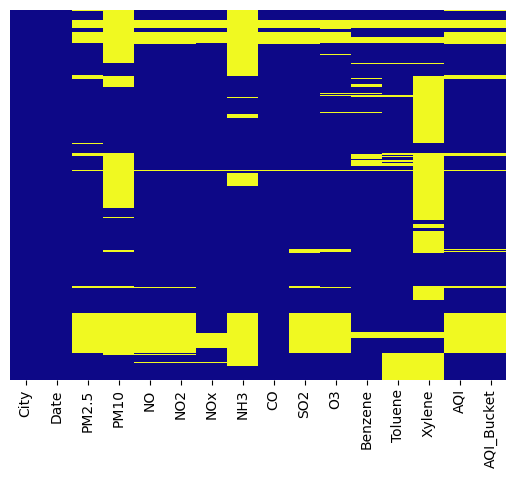

In [40]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [41]:
df.iloc[:, 1:13] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))
print(df)

            City       Date       PM2.5   PM10     NO    NO2    NOx    NH3  \
0      Ahmedabad  67.854497  114.584029   0.92  18.22  17.15    NaN   0.92   
1      Ahmedabad  67.854497  114.584029   0.97  15.69  16.46    NaN   0.97   
2      Ahmedabad  67.854497  114.584029  17.40  19.30  29.70    NaN  17.40   
3      Ahmedabad  67.854497  114.584029   1.70  18.48  17.97    NaN   1.70   
4      Ahmedabad  67.854497  114.584029  22.10  21.42  37.76    NaN  22.10   
...          ...        ...         ...    ...    ...    ...    ...    ...   
11158     Mumbai  18.040000   63.720000  28.29   8.58  36.07  26.69   0.43   
11159     Mumbai  12.330000   44.840000  27.15   8.06  34.78  26.50   0.38   
11160     Mumbai   7.880000   27.510000  26.58   7.94  34.42  23.94   0.38   
11161     Mumbai   4.660000   13.870000  25.25   8.02  33.25  19.89   0.36   
11162     Mumbai   3.840000   11.280000  27.64   5.57  33.21  23.60   0.37   

          CO     SO2    O3    Benzene  Toluene  Xylene   AQI   

<ipython-input-41-1b3adb739bab>:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.

<ipython-input-41-1b3adb739bab>:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.

<ipython-input-41-1b3adb739bab>:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [42]:
print(df.isnull().sum())

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx           2009
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene       4018
Xylene        6697
AQI           2208
AQI_Bucket    2208
dtype: int64


<Axes: >

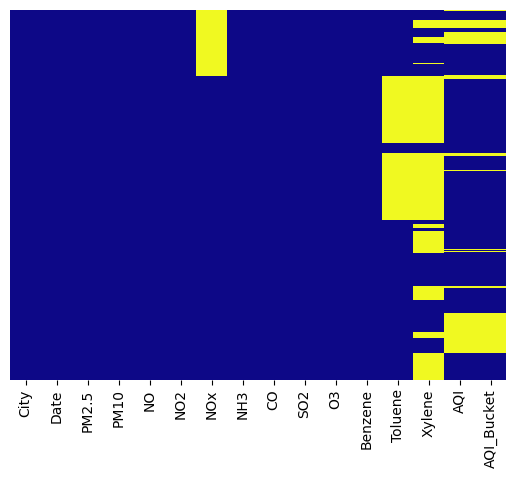

In [43]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma')


In [44]:
df.iloc[:,1:13]=df.fillna(df.mean())
df

<ipython-input-44-ce0c487f9be7>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,33.65868,0.92,27.64,133.36,0.00,0.020000,0.00,NaN,NaN
1,Ahmedabad,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,33.65868,0.97,24.55,34.06,3.68,5.500000,3.77,NaN,NaN
2,Ahmedabad,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,33.65868,17.40,29.07,30.70,6.80,16.400000,2.25,NaN,NaN
3,Ahmedabad,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,33.65868,1.70,18.59,36.08,4.43,10.140000,1.00,NaN,NaN
4,Ahmedabad,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,33.65868,22.10,39.33,39.31,7.01,18.890000,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,Mumbai,Mumbai,18.040000,63.720000,28.29,8.58,36.07,26.69000,0.43,10.36,5.68,0.82,0.013455,NaN,64.0,Satisfactory
11159,Mumbai,Mumbai,12.330000,44.840000,27.15,8.06,34.78,26.50000,0.38,10.58,5.76,0.85,0.013455,NaN,64.0,Satisfactory
11160,Mumbai,Mumbai,7.880000,27.510000,26.58,7.94,34.42,23.94000,0.38,11.11,5.84,0.47,0.013455,NaN,54.0,Satisfactory
11161,Mumbai,Mumbai,4.660000,13.870000,25.25,8.02,33.25,19.89000,0.36,13.40,6.94,0.73,0.013455,NaN,54.0,Satisfactory


In [45]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene        6697
AQI           2208
AQI_Bucket    2208
dtype: int64

<Axes: >

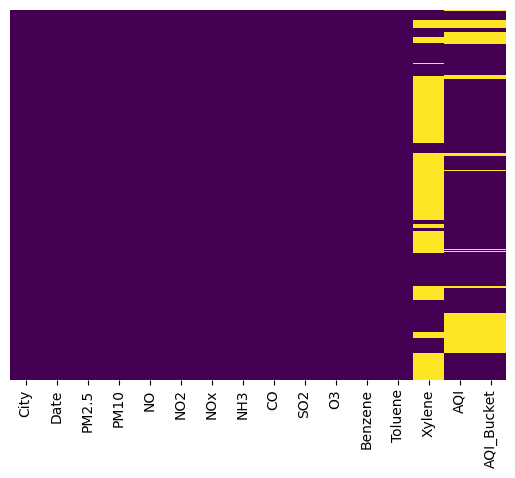

In [46]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Distribution of different pollutants in last 5 years


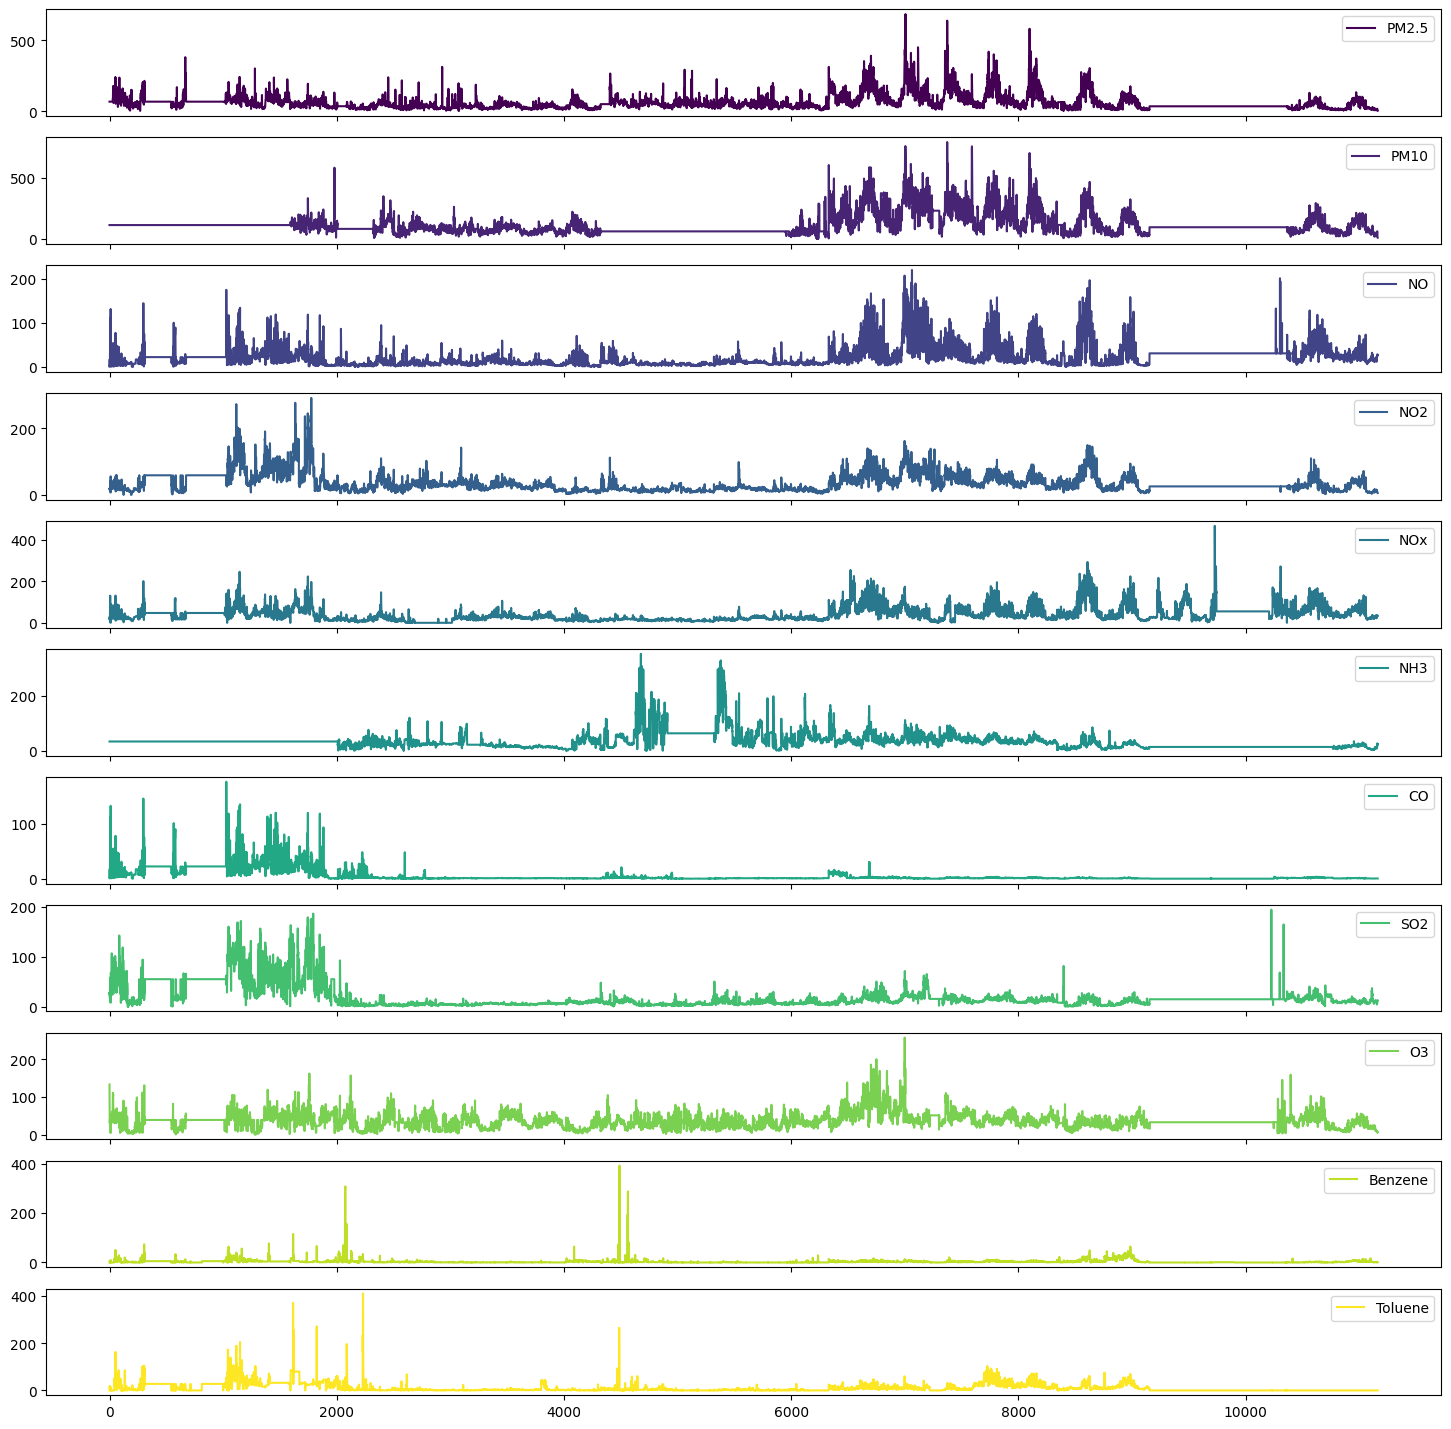

In [47]:
df_city_day = df.copy()
df_city_day.columns
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene',]
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(18,18),cmap='viridis',subplots=True,fontsize=10);

In [48]:
import plotly.express as px
fig1 = px.scatter(df, x='PM2.5', y='AQI', color='PM2.5', color_continuous_scale='cividis')
fig1.show()

In [49]:
import plotly.express as px
fig1 = px.scatter(df, x='PM10', y='AQI', color='PM10', color_continuous_scale='cividis')
fig1.show()

In [50]:
import plotly.express as px
fig1=px.scatter(df,x='NO',y='AQI',color='NO', color_continuous_scale='cividis')
fig1.show()

In [51]:
import plotly.express as px
fig1=px.scatter(df,x='NO2',y='AQI',color='NO2',color_continuous_scale='cividis')
fig1.show()

In [52]:
import plotly.express as px
fig1=px.scatter(df,x='NOx',y='AQI',color='NOx',color_continuous_scale='cividis')
fig1.show()

In [53]:
import plotly.express as px
fig1=px.scatter(df,x='NH3',y='AQI',color='NH3',color_continuous_scale='cividis')
fig1.show()

In [54]:
import plotly.express as px
fig1=px.scatter(df,x='CO',y='AQI',color='CO',color_continuous_scale='cividis')
fig1.show()

In [55]:
import plotly.express as px
fig1=px.scatter(df,x='SO2',y='AQI',color='SO2',color_continuous_scale='cividis')
fig1.show()

In [56]:
import plotly.express as px
fig1=px.scatter(df,x='O3',y='AQI',color='O3',color_continuous_scale='cividis')
fig1.show()

In [57]:
import plotly.express as px
fig1=px.scatter(df,x='Benzene',y='AQI',color='Benzene',color_continuous_scale='cividis')
fig1.show()

In [58]:
import plotly.express as px
fig1=px.scatter(df,x='Toluene',y='AQI',color='Toluene',color_continuous_scale='cividis')
fig1.show()

In [59]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [60]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,33.65868,0.92,27.64,...,0.00,149.0,NaN,109.333333,123.333333,33.75,21.25,8.25,0.000000,148.529412
1,Ahmedabad,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,33.65868,0.97,24.55,...,3.77,123.0,NaN,109.333333,123.333333,30.00,20.00,8.25,0.000000,34.000000
2,Ahmedabad,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,33.65868,17.40,29.07,...,2.25,300.0,NaN,109.333333,123.333333,36.25,36.25,8.25,300.000000,30.000000
3,Ahmedabad,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,33.65868,1.70,18.59,...,1.00,123.0,NaN,109.333333,123.333333,22.50,21.25,8.25,50.000000,36.000000
4,Ahmedabad,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,33.65868,22.10,39.33,...,2.78,329.0,NaN,109.333333,123.333333,48.75,46.25,8.25,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,Mumbai,Mumbai,18.040000,63.720000,28.29,8.58,36.07,26.69000,0.43,10.36,...,NaN,64.0,Satisfactory,63.000000,30.000000,12.50,45.00,6.50,0.000000,5.000000
11159,Mumbai,Mumbai,12.330000,44.840000,27.15,8.06,34.78,26.50000,0.38,10.58,...,NaN,64.0,Satisfactory,44.000000,20.000000,12.50,42.50,6.50,0.000000,5.000000
11160,Mumbai,Mumbai,7.880000,27.510000,26.58,7.94,34.42,23.94000,0.38,11.11,...,NaN,54.0,Satisfactory,27.000000,11.666667,13.75,42.50,5.75,0.000000,5.000000
11161,Mumbai,Mumbai,4.660000,13.870000,25.25,8.02,33.25,19.89000,0.36,13.40,...,NaN,54.0,Satisfactory,13.000000,6.666667,16.25,41.25,4.75,0.000000,6.000000


In [61]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'

df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Ahmedabad,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,33.65868,0.92,27.64,...,0.00,149.0,Moderate,109.333333,123.333333,33.75,21.25,8.25,0.000000,148.529412
1,Ahmedabad,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,33.65868,0.97,24.55,...,3.77,123.0,Moderate,109.333333,123.333333,30.00,20.00,8.25,0.000000,34.000000
2,Ahmedabad,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,33.65868,17.40,29.07,...,2.25,300.0,Poor,109.333333,123.333333,36.25,36.25,8.25,300.000000,30.000000
3,Ahmedabad,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,33.65868,1.70,18.59,...,1.00,123.0,Moderate,109.333333,123.333333,22.50,21.25,8.25,50.000000,36.000000
4,Ahmedabad,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,33.65868,22.10,39.33,...,2.78,329.0,Very Poor,109.333333,123.333333,48.75,46.25,8.25,329.411765,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11158,Mumbai,Mumbai,18.040000,63.720000,28.29,8.58,36.07,26.69000,0.43,10.36,...,NaN,64.0,Satisfactory,63.000000,30.000000,12.50,45.00,6.50,0.000000,5.000000
11159,Mumbai,Mumbai,12.330000,44.840000,27.15,8.06,34.78,26.50000,0.38,10.58,...,NaN,64.0,Satisfactory,44.000000,20.000000,12.50,42.50,6.50,0.000000,5.000000
11160,Mumbai,Mumbai,7.880000,27.510000,26.58,7.94,34.42,23.94000,0.38,11.11,...,NaN,54.0,Satisfactory,27.000000,11.666667,13.75,42.50,5.75,0.000000,5.000000
11161,Mumbai,Mumbai,4.660000,13.870000,25.25,8.02,33.25,19.89000,0.36,13.40,...,NaN,54.0,Satisfactory,13.000000,6.666667,16.25,41.25,4.75,0.000000,6.000000


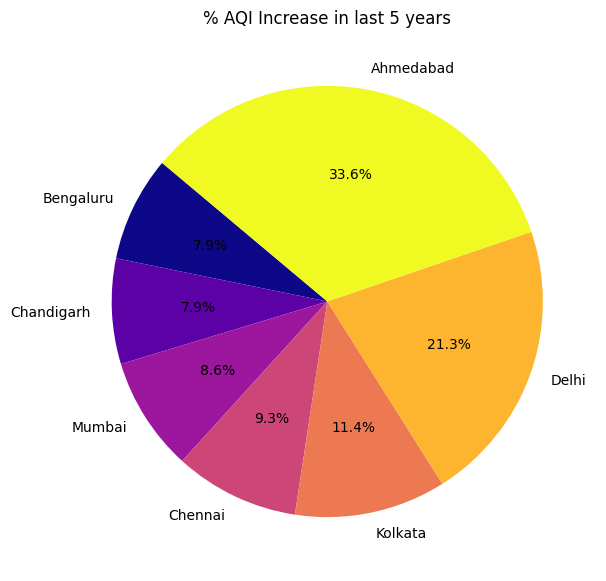

In [62]:
df[['City', 'AQI']].groupby('City').mean().sort_values('AQI').plot(kind='pie', y='AQI', autopct='%1.1f%%', startangle=140, figsize=(7, 7), legend=False, colormap='plasma')
plt.title('% AQI Increase in last 5 years')
plt.ylabel('')  # Remove the default y-label
plt.show()

In [63]:
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
0,149.0,Moderate
1,123.0,Moderate
2,300.0,Poor
3,123.0,Moderate
4,329.0,Very Poor
...,...,...
11158,64.0,Satisfactory
11159,64.0,Satisfactory
11160,54.0,Satisfactory
11161,54.0,Satisfactory


In [64]:
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

<ipython-input-64-f81b493129c0>:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [65]:
print("Enter the value of AQI:")
AQI = float(input("AQI : "))
output = clf.predict([[AQI]])
print(output)
#0-->Good
#1-->Satisfactory
#2-->Unhealthy for Sensitive Groups
#3-->Unhealthy
#4-->Very Unhealthy
#5-->Hazardous


Enter the value of AQI:
AQI : 45
['Good']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [66]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        92
    Moderate       1.00      1.00      1.00       739
        Poor       1.00      1.00      1.00       293
Satisfactory       1.00      1.00      1.00      1109
      Severe       1.00      1.00      1.00       222
   Very Poor       1.00      1.00      1.00       336

    accuracy                           1.00      2791
   macro avg       1.00      1.00      1.00      2791
weighted avg       1.00      1.00      1.00      2791

[[  92    0    0    0    0    0]
 [   0  739    0    0    0    0]
 [   0    0  293    0    0    0]
 [   0    0    0 1109    0    0]
 [   0    0    0    0  222    0]
 [   0    0    0    0    0  336]]
